In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

In [9]:
invest_co_mfg=pd.read_excel('data\\invest_mfg_co.xlsx',index_col=0)
patent_mfg=pd.read_csv('X:\Downloads\Patent\\patent_invest_mfg_2410.csv',index_col=0)
patent_mfg.shape

C:\Users\Prime\AppData\Local\Temp\ipykernel_43084\2085166764.py:3: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  patent_mfg=pd.read_csv('X:\Downloads\Patent\\patent_invest_mfg_2410.csv',index_col=0)


(2133679, 32)

In [3]:
patent_mfg.columns

Index(['标题 (中文)', '摘要 (中文)', '申请人', '申请日', '申请号', '公开（公告）号', '公开（公告）日', '专利类型',
       '专利有效性', '公开国别', 'IPC主分类', 'IPC', '申请人类型', '发明人', '发明人数量', '简单同族',
       '扩展同族', '简单同族个数', '引证专利', '引证科技文献', '引证次数', '被引证次数', '引证申请人', '被引证申请人',
       '申请人数量', '许可次数', '转让次数', '权利要求数量', '当前法律状态', '当前权利人', '工商统一社会信用代码',
       'table_name'],
      dtype='object')

In [62]:
invest_co_mfg.columns

Index(['行业', '子行业', '企业全称', 'all'], dtype='object')

In [19]:
patent_mfg['公开（公告）日']=pd.to_datetime(patent_mfg['公开（公告）日'])
patent_mfg['申请日']=pd.to_datetime(patent_mfg['申请日'])
patent_mfg['申请年']=patent_mfg['申请日'].dt.year
patent_mfg=patent_mfg.sort_values(['申请日','公开（公告）日']).drop_duplicates(['申请号','专利类型','公开（公告）号'],keep='last').reset_index(drop=True)
patent_mfg.shape

(2020157, 35)

In [ ]:
patent_mfg['Co'] = np.where((patent_mfg.当前法律状态=='授权')&(pd.notna(patent_mfg.当前权利人)),patent_mfg.当前权利人,patent_mfg.申请人)
patent_mfg['Co'].isna().sum()

In [21]:
# patent_mfg.reset_index(drop=True,inplace=True)
patent_mfg.index

RangeIndex(start=0, stop=2020157, step=1)

In [25]:
# patent_mfg['企业全称']=patent_mfg['申请人'].str.split(';').apply(lambda x: [i.strip() for i in x if i.strip()])
# patent_mfg['权利人']=patent_mfg['当前权利人'].dropna().str.split(';').apply(lambda x: [i.strip() for i in x if i.strip()])#strip().replace('',pd.NA)
# patent_co=patent_mfg.explode('企业全称').explode('权利人')
# patent_co=patent_co[patent_co['企业全称'].isin(invest_co_mfg.企业全称)|patent_co['权利人'].isin(invest_co_mfg.企业全称)]
# patent_co.shape

(2872853, 35)

In [27]:
# patent_co['企业全称'].nunique(),patent_co['权利人'].nunique(),patent_co['申请号'].nunique()

(38644, 35080, 1780990)

In [33]:
#patent_co.loc[patent_co['权利人'].isin(invest_co_mfg.企业全称),'权利人'].nunique(),patent_co.loc[patent_co['企业全称'].isin(invest_co_mfg.企业全称),'企业全称'].nunique()

(15291, 15238)

In [40]:
patent_applicants=patent_mfg['申请人'].str.split(';').explode().str.strip()
patent_holders=patent_mfg['当前权利人'].str.split(';').explode().str.strip()

matching_patent_name=patent_applicants[patent_applicants.isin(invest_co_mfg.企业全称)]
#patent_mfg.loc[matching_patent_name.index,'企业全称']=matching_patent_name

matching_patent_name_1=patent_holders[patent_holders.isin(invest_co_mfg.企业全称)]
#patent_mfg.loc[matching_patent_name.index,'权利人']=matching_patent_name
matching_patent_name.nunique(),matching_patent_name_1.nunique()#(15238, 15291)

(15238, 15291)

In [46]:
merged_patents = pd.merge(matching_patent_name, matching_patent_name_1, left_index=True, right_index=True, how='outer')
merged_patents

,申请人,当前权利人
0,NaN,安泰科技股份有限公司
1,NaN,安泰科技股份有限公司
2,NaN,安泰科技股份有限公司
3,NaN,安泰科技股份有限公司
4,NaN,安泰科技股份有限公司
...,...,...
2020155,唐山钢铁集团有限责任公司,唐山钢铁集团有限责任公司
2020155,唐山钢铁集团有限责任公司,河钢乐亭钢铁有限公司
2020155,河钢乐亭钢铁有限公司,唐山钢铁集团有限责任公司
2020155,河钢乐亭钢铁有限公司,河钢乐亭钢铁有限公司


In [47]:
patent_co=patent_mfg.loc[merged_patents.index]
patent_co[['企业全称', '权利人']]=merged_patents
patent_co.shape

(2043796, 35)

In [55]:
patent_co[['企业全称', '权利人']].isna().all(axis=1).sum()

19

In [49]:
patent_co['企业全称'].nunique(),patent_co['权利人'].nunique(),patent_co['申请号'].nunique()

(15238, 15291, 1780990)

In [58]:
patent_co.dropna(subset=['企业全称', '权利人'],how='all',inplace=True)
patent_co.reset_index(drop=True,inplace=True)

In [61]:
patent_co[['申请人','当前权利人','企业全称', '权利人']].dropna(how='any')

,申请人,当前权利人,企业全称,权利人
52,重庆钢铁股份有限公司,重庆钢铁股份有限公司,重庆钢铁股份有限公司,重庆钢铁股份有限公司
53,华东冶金学院; 马鞍山钢铁股份有限公司,华东冶金学院; 马鞍山钢铁股份有限公司,马鞍山钢铁股份有限公司,马鞍山钢铁股份有限公司
56,马鞍山钢铁股份有限公司,马鞍山钢铁股份有限公司,马鞍山钢铁股份有限公司,马鞍山钢铁股份有限公司
59,马鞍山钢铁股份有限公司,马鞍山钢铁股份有限公司,马鞍山钢铁股份有限公司,马鞍山钢铁股份有限公司
65,马鞍山钢铁股份有限公司,马鞍山钢铁股份有限公司,马鞍山钢铁股份有限公司,马鞍山钢铁股份有限公司
...,...,...,...,...
2043772,唐山钢铁集团有限责任公司; 河钢乐亭钢铁有限公司; 河钢股份有限公司唐山分公司,唐山钢铁集团有限责任公司; 河钢乐亭钢铁有限公司; 河钢股份有限公司唐山分公司,唐山钢铁集团有限责任公司,唐山钢铁集团有限责任公司
2043773,唐山钢铁集团有限责任公司; 河钢乐亭钢铁有限公司; 河钢股份有限公司唐山分公司,唐山钢铁集团有限责任公司; 河钢乐亭钢铁有限公司; 河钢股份有限公司唐山分公司,唐山钢铁集团有限责任公司,河钢乐亭钢铁有限公司
2043774,唐山钢铁集团有限责任公司; 河钢乐亭钢铁有限公司; 河钢股份有限公司唐山分公司,唐山钢铁集团有限责任公司; 河钢乐亭钢铁有限公司; 河钢股份有限公司唐山分公司,河钢乐亭钢铁有限公司,唐山钢铁集团有限责任公司
2043775,唐山钢铁集团有限责任公司; 河钢乐亭钢铁有限公司; 河钢股份有限公司唐山分公司,唐山钢铁集团有限责任公司; 河钢乐亭钢铁有限公司; 河钢股份有限公司唐山分公司,河钢乐亭钢铁有限公司,河钢乐亭钢铁有限公司


In [60]:
patent_co.to_csv('data/patent_co_invest_mfg_2043_15k_202410.csv')

In [5]:
pd.read_csv('data/patent_co_invest_mfg_2043_15k_202410.csv',index_col=0,nrows=10).columns

Index(['标题 (中文)', '摘要 (中文)', '申请人', '申请日', '申请号', '公开（公告）号', '公开（公告）日', '专利类型',
       '专利有效性', '公开国别', 'IPC主分类', 'IPC', '申请人类型', '发明人', '发明人数量', '简单同族',
       '扩展同族', '简单同族个数', '引证专利', '引证科技文献', '引证次数', '被引证次数', '引证申请人', '被引证申请人',
       '申请人数量', '许可次数', '转让次数', '权利要求数量', '当前法律状态', '当前权利人', '工商统一社会信用代码',
       'table_name', '申请年', '企业全称', '权利人'],
      dtype='object')

In [5]:
patent_co=pd.read_csv('data/patent_co_invest_mfg_2043_15k_202410.csv',usecols=[ '申请日', '申请号', '公开（公告）号', '公开（公告）日', '专利类型',
       '专利有效性',  'IPC主分类', '引证专利', '当前法律状态', 'table_name','申请年','企业全称', '权利人'])#'申请人', '当前权利人','工商统一社会信用代码',
patent_co.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043777 entries, 0 to 2043776
Data columns (total 13 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   申请日         object
 1   申请号         object
 2   公开（公告）号     object
 3   公开（公告）日     object
 4   专利类型        object
 5   专利有效性       object
 6   IPC主分类      object
 7   引证专利        object
 8   当前法律状态      object
 9   table_name  object
 10  申请年         int64 
 11  企业全称        object
 12  权利人         object
dtypes: int64(1), object(12)
memory usage: 202.7+ MB


In [42]:
invest_all=pd.read_excel('data\invest_all.xlsx',usecols=['所在行业','企业全称','交易时间','交易轮次'])
invest=pd.read_excel('data/公司融资数据整理修正-20240301.xlsx',usecols=['工商全称', '行业', '子行业', '融资时间', '轮次'])

In [43]:
invest_all[['行业','子行业']]=invest_all.所在行业.str.split('-', expand=True).fillna(pd.NA)

In [44]:
invest_co=invest_all.loc[(invest_all['行业']=='传统制造')|(invest_all['行业']=='先进制造'),['行业','子行业','企业全称','交易时间','交易轮次']].drop_duplicates()
invest_co['all']=1

In [45]:
invest_co_mfg=invest.loc[(invest['行业']=='传统制造')|(invest['行业']=='先进制造'),['行业','子行业','工商全称', '融资时间', '轮次']].drop_duplicates()
invest_co_mfg['all']=0
invest_co_mfg.rename(columns={'工商全称':'企业全称','融资时间':'交易时间','轮次':'交易轮次'},inplace=True)

In [49]:
invest_co=pd.concat([invest_co,invest_co_mfg])
invest_co.shape,invest_co.企业全称.nunique(),invest_co.企业全称.isna().sum()

((47312, 6), 21915, 39)

In [47]:
invest_co.groupby(['行业','all'],as_index=False)['企业全称'].nunique()

,行业,all,企业全称
0,传统制造,0,5690
1,传统制造,1,6614
2,先进制造,0,10027
3,先进制造,1,3332


In [48]:
invest_co.count()

行业      47312
子行业     47312
企业全称    47273
交易时间    47178
交易轮次    47178
all     47312
dtype: int64

In [75]:
invest_co=invest_co[(~invest_co.企业全称.isna())&(~invest_co.交易时间.isna())].reset_index(drop=True)
invest_co.交易时间=pd.to_datetime(invest_co.交易时间)
invest_co.groupby('企业全称').行业.nunique().sort_values()

企业全称
1KOMMA5 ° GmbH     1
浙江吉泰智能科技有限公司       1
浙江吉成新材股份有限公司       1
浙江吉宁科技有限公司         1
浙江吉华集团股份有限公司       1
                  ..
奕目（上海）科技有限公司       2
湖北龙辰科技股份有限公司       2
广东科雷明斯智能科技有限公司     2
东华能源（宁波）新材料有限公司    2
广东鑫光智能系统有限公司       2
Name: 行业, Length: 21811, dtype: int64

In [59]:
invest_co[invest_co.企业全称.isin(['明阳智慧能源集团股份公司','浙江永昌电气股份有限公司'])]

,行业,子行业,企业全称,交易时间,交易轮次,all
83,传统制造,机械设备,明阳智慧能源集团股份公司,2017-02-27,战略融资,1
354,传统制造,机械设备,明阳智慧能源集团股份公司,2016-12-19,战略融资,1
1112,传统制造,机械设备,明阳智慧能源集团股份公司,2016-03-01,A,1
7476,传统制造,传统制造其他,浙江永昌电气股份有限公司,2022-01-27,定向增发,1
10228,传统制造,机械设备,明阳智慧能源集团股份公司,2018-11-29,战略融资,1
13882,传统制造,机械设备,明阳智慧能源集团股份公司,2017-03-22,战略融资,1
19471,传统制造,环保,明阳智慧能源集团股份公司,2019-01-24,IPO上市,0
19472,传统制造,环保,明阳智慧能源集团股份公司,2015-05-22,A轮,0
36529,先进制造,家用电器,浙江永昌电气股份有限公司,2018-10-25,新三板,0
37029,先进制造,新能源,明阳智慧能源集团股份公司,2018-11-29,战略投资,0


In [78]:
invest_co.to_excel('data\\invest_mfg_co.xlsx')

In [6]:
invest_co=pd.read_excel('data\\invest_mfg_co.xlsx',index_col=0)
invest_co.shape

(47139, 6)

In [64]:
invest_co[invest_co['all']==1].子行业.value_counts()

子行业
机械设备      5998
传统制造其他    3440
高端装备制造    1993
机器人       1816
新材料       1803
先进制造其他     749
金属矿业制造     682
航空航天       642
电工电气       591
纺织行业       249
造纸行业       210
木材加工制造      54
Name: count, dtype: int64

In [65]:
invest_co[invest_co['all']==0].子行业.value_counts()

子行业
集成电路       4908
新材料        2529
新能源        2238
环保         2236
机械设备       2181
智能装备       1648
机器人        1559
轻工制造       1446
化工产业       1347
通信制造       1330
电子设备       1286
传感设备        934
家用电器        880
工业4.0       790
采矿业         628
AR/VR设备     561
航空航天        431
可穿戴设备       372
无人机         353
公用事业        292
纺织业         264
国防军工        242
3D打印        207
园林园艺        146
其他工业        119
其他传统制造      117
数字货币          1
数字人           1
Name: count, dtype: int64

In [70]:
zhy=set(invest_co[invest_co['all']==1].子行业.unique())&set(invest_co[invest_co['all']==0].子行业.unique())
zhy

{'新材料', '机器人', '机械设备', '航空航天'}

In [71]:
invest_co.loc[invest_co.子行业.isin(zhy)].groupby('行业').子行业.unique()

行业
传统制造              [机械设备]
先进制造    [机器人, 新材料, 航空航天]
Name: 子行业, dtype: object

In [72]:
del patent_mfg

In [11]:
patent_co=pd.read_csv('data/patent_co_invest_mfg_2043_15k_202410.csv',index_col=0)
patent_co.shape

(2043777, 13)

In [7]:
patent_co['公开（公告）日']=pd.to_datetime(patent_co['公开（公告）日'])
patent_co['申请日']=pd.to_datetime(patent_co['申请日'])
patent_co['Co'] = np.where(pd.notna(patent_co.企业全称),patent_co.企业全称,patent_co.权利人)#当前法律状态=='授权'
patent_co['Co'].isna().sum()

0

In [8]:
patent_co['传统制造']=patent_co['Co'].isin(invest_co.loc[invest_co.行业=='传统制造','企业全称']).astype(int)
patent_co['先进制造']=patent_co['Co'].isin(invest_co.loc[invest_co.行业=='先进制造','企业全称']).astype(int)
patent_co['传统制造'].sum(),patent_co['先进制造'].sum()

(1037773, 1401478)

In [12]:
patent_co['摘要 (中文)'].str.len().describe()

count    2.038206e+06
mean     2.411021e+02
std      6.835491e+01
min      6.000000e+00
25%      2.040000e+02
50%      2.590000e+02
75%      2.890000e+02
max      1.282900e+04
Name: 摘要 (中文), dtype: float64

In [8]:
from w2v_lda import *
import time
Stopwords=set(read2list('data\\专利停用词表2024.txt'))
jieba.initialize()
jieba.load_userdict('data\\专利分词词库.txt') 

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Prime\AppData\Local\Temp\jieba.cache
Loading model cost 0.743 seconds.
Prefix dict has been built successfully.


In [75]:
%%time
st=time.time()
model=W2vLda(sentences=None,patent_data=patent_co,co_data=patent_co['企业全称'],suffix='invest_mfg',stop_words=Stopwords,
     vector_size=300,sg=1,window=5,count_fifter=5,min_count=3,no_below=3,num_topics=75,chunksize=3000,keep_n=800000,passes=3,no_above=0.99,
     top_n_words=30, top_n_topics=4,minimum_probability=0.03,weight_threshold_topics=0.03)

print('1:',time.time()-st)

res=model.on_corpus()#vector_size=300,num_topics=75
print('2:',time.time()-st,res)
model.save()

topics_vec,documents_vec=model.on_topics()
print('3:',time.time()-st,documents_vec.shape)

doc_lda_w2v =model.docs_vec(documents_vec)

1: 3720.9629690647125
{'vector_size': 300, 'sg': 1, 'window': 5, 'len_below': 2, 'no_below': 3, 'min_count': 3, 'count_fifter': 5, 'num_topics': 75, 'top_n_words': 30, 'top_n_topics': 4, 'minimum_probability': 0.03, 'weight_threshold_topics': 0.03, 'chunksize': 3000, 'keep_n': 800000, 'passes': 3, 'no_above': 0.99}
2: 16882.163140773773 (273800, 213471, 213471)
3: 18747.691304206848 (2037180, 300)


ArrowMemoryError: malloc of size 16297408 failed

In [19]:
patent_co.groupby('Co').apply(lambda x: x['公开（公告）号'].tolist()).reset_index(name='index_list').to_parquet(f'data\patent_co_ids_invest_mfg.parquet', index=False) 

In [32]:
import w2v_lda
import importlib
importlib.reload(w2v_lda)
from w2v_lda import *

In [33]:
model=W2vLda(sentences=None,patent_data=None,co_data=patent_co['Co'],suffix='invest_mfg',stop_words=Stopwords,
     vector_size=300,sg=1,window=5,count_fifter=5,min_count=3,no_below=3,num_topics=75,chunksize=3000,keep_n=800000,passes=3,no_above=0.99,
     top_n_words=30, top_n_topics=4,minimum_probability=0.03,weight_threshold_topics=0.03)
model.sentences.shape

(2037180,)

In [34]:
model.load(lda=False)

In [39]:
sentences_all=model.sentences.copy()
filter_values=patent_co.loc[patent_co['先进制造']==1,'公开（公告）号']
model.suffix = 'invest_mfg_xj'
model.sentences=model.sentences[model.sentences.index.isin(filter_values)]
len(sentences_all),len(model.sentences),len(filter_values)

(2037180, 1410530, 1406032)

In [40]:
%%time
model.on_corpus()

{'vector_size': 300, 'sg': 1, 'window': 5, 'len_below': 2, 'no_below': 3, 'min_count': 3, 'count_fifter': 5, 'num_topics': 75, 'top_n_words': 30, 'top_n_topics': 4, 'minimum_probability': 0.03, 'weight_threshold_topics': 0.03, 'chunksize': 3000, 'keep_n': 800000, 'passes': 3, 'no_above': 0.99}
CPU times: total: 2h 4min 1s
Wall time: 2h 4min 11s


(273800, 213471, 213471)

In [41]:
model.topics_words(topn=30).value_counts()[:30]

word
效率    11
降低    10
位于     8
过程     7
情况     7
避免     6
相对     6
判断     6
内部     6
表面     6
生成     6
设有     6
性能     5
依次     5
方式     5
运行     5
实时     5
需要     5
接收     4
有效     4
效果     4
环境     4
快速     4
工作     4
处于     4
结构     4
成本     4
质量     3
分析     3
时间     3
Name: count, dtype: int64

In [57]:
%%time
topics_vec,documents_vec=model.on_topics()
doc_lda_w2v_xj =model.docs_vec(documents_vec)
doc_lda_w2v_xj.shape

CPU times: total: 21min 35s
Wall time: 21min 12s


(1410528, 300)

In [82]:
%%time
st=time.time()
filter_values=patent_co.loc[patent_co['传统制造']==1,'公开（公告）号']
model.suffix = 'invest_mfg_ct'
model.sentences=sentences_all[sentences_all.index.isin(filter_values)]
print('1:',time.time()-st,len(model.sentences),len(filter_values))

model.lda = None
res=model.on_corpus()
print('2:',time.time()-st,res)
topics_vec_ct,documents_vec=model.on_topics()
print('3:',time.time()-st,documents_vec.shape)

doc_lda_w2v_ct =model.docs_vec(documents_vec)
doc_lda_w2v_ct.shape

1: 0.952998161315918 1043954 1038319
{'vector_size': 300, 'sg': 1, 'window': 5, 'len_below': 2, 'no_below': 3, 'min_count': 3, 'count_fifter': 5, 'num_topics': 75, 'top_n_words': 30, 'top_n_topics': 4, 'minimum_probability': 0.03, 'weight_threshold_topics': 0.03, 'chunksize': 3000, 'keep_n': 800000, 'passes': 3, 'no_above': 0.99}
2: 5595.14247751236 (273800, 213471, 213471)
3: 6557.001521110535 (1043954, 300)
CPU times: total: 1h 50min 5s
Wall time: 1h 49min 47s


(1043952, 300)

In [29]:
doc_lda_w2v_xj=pd.read_parquet(f'data\\documents_vec_invest_mfg_xj.parquet')
doc_lda_w2v_xj.shape

(1410528, 300)

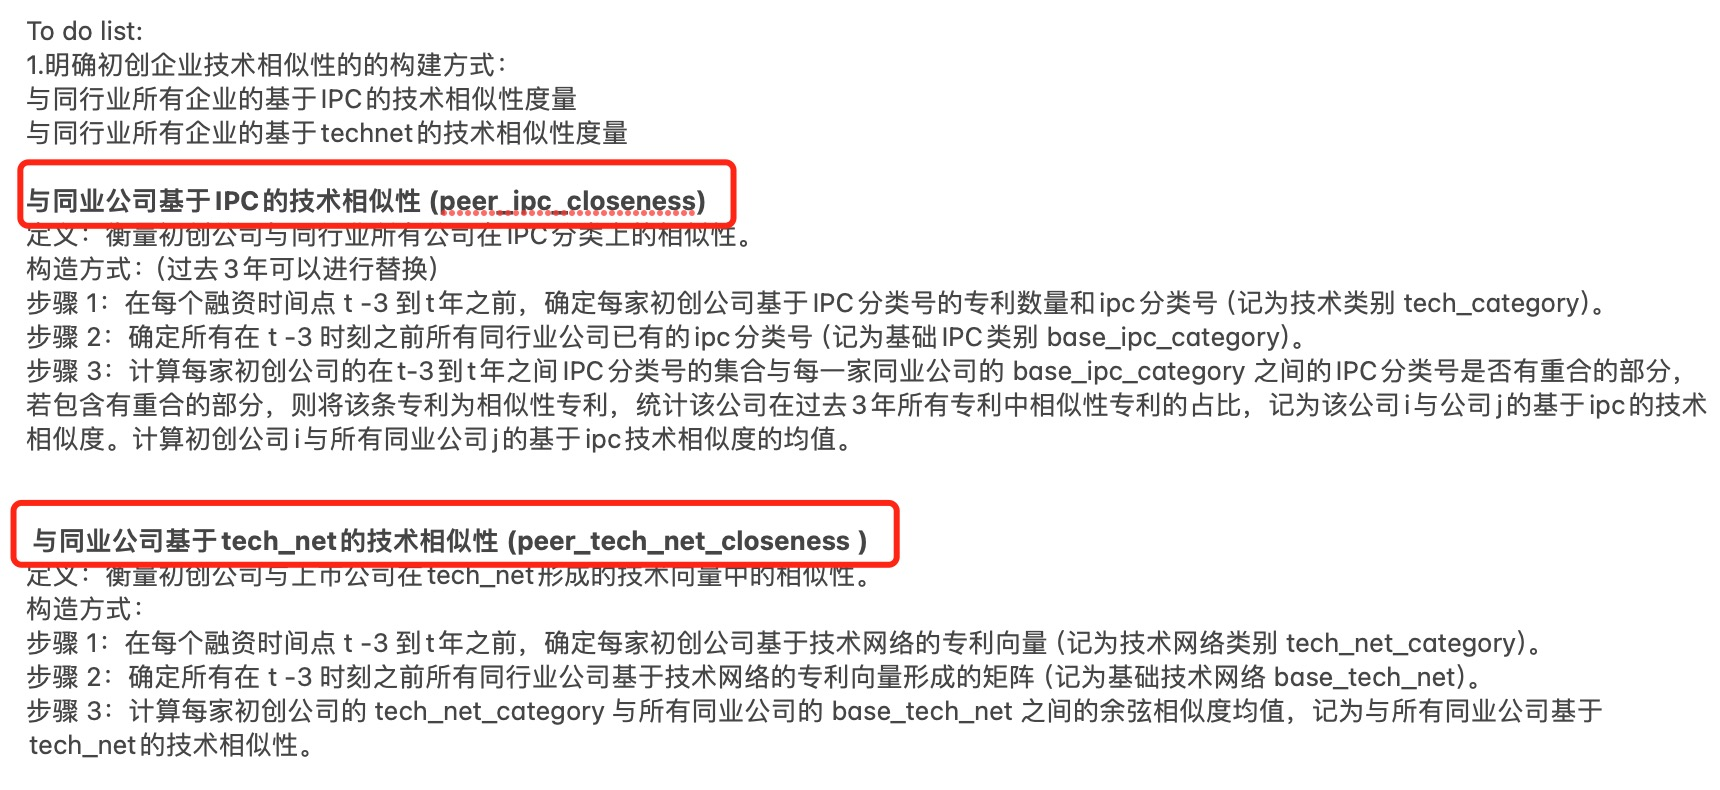

To do list:
1.明确初创企业技术相似性的的构建方式：
与同行业所有企业的基于IPC的技术相似性度量
与同行业所有企业的基于technet的技术相似性度量

与同业公司基于IPC的技术相似性 (peer_ipc_closeness)
定义：衡量初创公司与同行业所有公司在IPC分类上的相似性。
构造方式：（过去3年可以进行替换）
步骤 1：在每个融资时间点 t -3 到t年之前，确定每家初创公司基于IPC分类号的专利数量和ipc分类号（记为技术类别 tech_category）。
步骤 2：确定所有在 t -3 时刻之前所有同行业公司已有的ipc分类号（记为基础IPC类别 base_ipc_category）。
步骤 3：计算每家初创公司的在t-3到t年之间IPC分类号的集合与每一家同业公司的 base_ipc_category 之间的IPC分类号是否有重合的部分，若包含有重合的部分，则将该条专利为相似性专利，统计该公司在过去3年所有专利中相似性专利的占比，记为该公司i与公司j的基于ipc的技术相似度。计算初创公司i与所有同业公司j的基于ipc技术相似度的均值。


 与同业公司基于tech_net的技术相似性 (peer_tech_net_closeness )
定义：衡量初创公司与上市公司在tech_net形成的技术向量中的相似性。
构造方式：
步骤 1：在每个融资时间点 t -3 到t年之前，确定每家初创公司基于技术网络的专利向量（记为技术网络类别 tech_net_category）。
步骤 2：确定所有在 t -3 时刻之前所有同行业公司基于技术网络的专利向量形成的矩阵（记为基础技术网络 base_tech_net）。
步骤 3：计算每家初创公司的 tech_net_category 与所有同业公司的 base_tech_net 之间的余弦相似度均值，记为与所有同业公司基于tech_net的技术相似性。


2.分析过往3年专利 IPC和technet相关性：
计算在同一行业中，peer_ipc_closeness和peer_tech_net_closeness之间的相关系数大小。

3.与上市公司的基于citation的探索性、渐进性变量进行比较，验证technet方法的有效性：
计算上市公司的探索性（Explorative）与渐进性（Exploitative）变量，并将基于technet方法构建的变量与渐进性变量进行相关性对比（基于与上市公司的citation比较，可以进一步确定度量技术相似性指标的threshold）

4.用初创公司相同ipc的企业做进一步分析体现technet优势：
1）从专利层面，统计ipc完全重合的专利，计算这些专利在technet的技术相似性上的是否存在差异
2）从公司层面，统计ipc完全重合的公司，计算这些公司在technet的技术相似性上的是否存在差异
IPC分类号相同的部分，新的IPC和非新的IPC的patent之间有一定的相似度
IPC分类会低估创新性，只能capture最extreme的部分

In [12]:
patent_co['技术大类'] =patent_co.IPC主分类.str.strip().str[:3]
patent_co['引证专利_A'] = patent_co['引证专利'].fillna('').str.split(';').apply(lambda x: [i.strip() for i in x if i.strip()])

In [22]:
%%time
knowledge_year=5
invest_co_xj=invest_co[invest_co.行业=='先进制造'].copy()#.sort_values(by='交易时间')

for year in sorted(invest_co_xj.交易时间.dt.year.unique()):
    max_date=pd.to_datetime(year, format='%Y')+ pd.offsets.YearEnd()
    filter_invest = invest_co_xj[invest_co_xj.交易时间.dt.year==year]
    filter_patent = patent_co[(patent_co.先进制造==1)&(patent_co.申请年 <= year)]# <= data
    
    if filter_patent.empty:
        continue

    cosine_sim= {}
    ipc_similarity = {}

    for n in [1,2,3]:
        mask_base=filter_patent.申请日 <  max_date-pd.Timedelta(days=n*365) # pd.Timestamp(year) - pd.DateOffset(years=n)date- pd.DateOffset(years=3)
        
        base_ipc_category=  set(filter_patent.loc[mask_base, '技术大类'].dropna().unique())# filter_patent[mask_base].groupby('Co')['技术大类'].dropna().apply(set).to_dict(), base_ipc_category.get(group.name, set())

        def ipc_similarity_ratio(group):
            # tech_set = {ipc for co, ipcs in base_ipc_category.items() if co != group.name for ipc in ipcs}
            similar_patent_count = sum(group['技术大类'].apply(lambda ipc: ipc in base_ipc_category))
            return  similar_patent_count / group.shape[0] if group.shape[0] else 0

        ipc_similarity[n]=filter_patent[~mask_base].groupby('Co').apply(ipc_similarity_ratio)
        
        group_ids_t = filter_patent[mask_base].groupby('Co')['公开（公告）号'].apply(list)
        base_tech_net = group_ids_t.apply(lambda x: doc_lda_w2v_xj.loc[doc_lda_w2v_xj.index.isin(x)].mean(axis=0))
     
        group_ids_t = filter_patent[~mask_base].groupby('Co')['公开（公告）号'].apply(list)
        tech_net_category = group_ids_t.apply(lambda x: doc_lda_w2v_xj.loc[doc_lda_w2v_xj.index.isin(x)].mean(axis=0))

        if not tech_net_category.empty and not base_tech_net.empty:
            tech_net_category = tech_net_category[tech_net_category.sum(axis=1) != 0]
            base_tech_net = base_tech_net[base_tech_net.sum(axis=1) != 0]
            cosine_sim_values = cosine_similarity(tech_net_category.values, base_tech_net.values)
            cosine_sim[n] = pd.Series(cosine_sim_values.mean(axis=1), index=tech_net_category.index)
        else:
            cosine_sim[n] =pd.Series(dtype=float)
        
        
    for index,row in filter_invest.iterrows():
        company_name = row['企业全称']
        date = row['交易时间']

        for n in [1,2,3]:
            invest_co_xj.at[index,f'peer_ipc_closeness_{n}'] = ipc_similarity[n].get(company_name, 0)
            invest_co_xj.at[index, f'peer_tech_net_closeness_{n}'] = cosine_sim[n].loc[company_name].mean() if company_name in cosine_sim[n].index else 0
                    
        filter_value = filter_patent[filter_patent.Co==company_name].sort_values(['申请日','公开（公告）日']).drop_duplicates(['申请号','专利类型'],keep='last')
        if filter_value.empty:
            continue

        mask_years = filter_value['申请年'].between(year - knowledge_year, year - 1)
        tech_category = filter_value.loc[mask_years,'技术大类'].dropna().to_list()
        past_citations = filter_value.loc[mask_years,'引证专利_A'].explode().dropna()#.str.strip()
        past_patents = filter_value.loc[filter_value['申请年'] != year,'公开（公告）号'].dropna().str.strip()
        existing_knowledge = set(past_patents) | set(past_citations)

        filter_value_year = filter_value[filter_value['申请年'] ==  year]
        if filter_value_year.empty: 
            continue
        explorative_percentage = filter_value_year['引证专利_A'].apply(lambda x:len(set(x) - set(existing_knowledge)) / len(x) if (isinstance(x, list) and len(x)) else 0)
        exploitative_percentage = filter_value_year['引证专利_A'].apply(lambda x:len(set(x) & set(existing_knowledge)) / len(x) if (isinstance(x, list) and len(x)) else 0)
        
        invest_co_xj.at[index, 'explorative'] = (explorative_percentage > 0.8).sum() / len(explorative_percentage) #.mean()
        invest_co_xj.at[index, 'exploitative'] = (exploitative_percentage > 0.8).sum() / len(exploitative_percentage)
        invest_co_xj.at[index, 'jianjin_patent_num'] = filter_value_year['技术大类'].isin(tech_category).sum()
        
    print(year,filter_patent['Co'].nunique(),filter_invest['企业全称'].nunique())
    del cosine_sim
    del ipc_similarity

1992 8 4
1993 14 9
1994 17 4
1995 24 6
1996 39 14
1997 57 14
1998 74 10
1999 105 2
2000 145 27
2001 237 27
2002 343 35
2003 472 36
2004 654 37
2005 887 31
2006 1251 45
2007 1674 92
2008 2303 114
2009 2975 125
2010 3676 312
2011 4427 364
2012 5192 324
2013 5944 311
2014 6693 841
2015 7553 1548
2016 8407 2160
2017 9118 1967
2018 9689 1875
2019 10131 1719
2020 10531 1827
2021 14270 2428
2022 14916 2771
2023 15393 2614
2024 15402 735
CPU times: total: 13h 5min 18s
Wall time: 13h 4min 47s


In [23]:
invest_co_xj.to_csv('data\\invest_patent_先进制造_202410.csv')

In [9]:
doc_lda_w2v_ct=pd.read_parquet(f'data\\documents_vec_invest_mfg_ct.parquet')
doc_lda_w2v_ct.shape

(1043952, 300)

In [43]:
ipc_similarity[n]

Co
安徽鑫科新材料股份有限公司     0.000000
安泰科技股份有限公司        0.333333
河北古城香业集团股份有限公司    0.000000
珠海格力电器股份有限公司      0.000000
福建福晶科技股份有限公司      0.000000
马鞍山钢铁股份有限公司       0.200000
dtype: float64

In [48]:
invest_co_ct.loc[filter_invest.index] 

,行业,子行业,企业全称,交易时间,交易轮次,all
25034,传统制造,环保,上海飞乐音响股份有限公司,1990-12-19,IPO上市,0


In [50]:
cosine_sim[2].get('马鞍山钢铁股份有限公司')

0.8984980492463559

In [51]:
%%time
knowledge_year=5
invest_co_ct=invest_co[invest_co.行业=='传统制造'].copy()#.sort_values(by='交易时间')

for year in sorted(invest_co_ct.交易时间.dt.year.unique()):
    max_date=pd.to_datetime(year, format='%Y')+ pd.offsets.YearEnd()
    filter_invest = invest_co_ct[invest_co_ct.交易时间.dt.year==year]
    filter_patent = patent_co[(patent_co.传统制造==1)&(patent_co.申请年 <= year)]# <= data
    
    if filter_patent.empty:
        continue

    for n in [1,2,3]:
        mask_base=filter_patent.申请日 <  max_date-pd.Timedelta(days=n*365) # pd.Timestamp(year) - pd.DateOffset(years=n)date- pd.DateOffset(years=3)
        
        base_ipc_category=  set(filter_patent.loc[mask_base, '技术大类'].dropna().unique())# filter_patent[mask_base].groupby('Co')['技术大类'].dropna().apply(set).to_dict(), base_ipc_category.get(group.name, set())

        def ipc_similarity_ratio(group):
            # tech_set = {ipc for co, ipcs in base_ipc_category.items() if co != group.name for ipc in ipcs}
            similar_patent_count = sum(group['技术大类'].apply(lambda ipc: ipc in base_ipc_category))
            return  similar_patent_count / group.shape[0] if group.shape[0] else 0


        ipc_similarity=filter_patent[~mask_base].groupby('Co').apply(ipc_similarity_ratio)
        invest_co_ct.loc[filter_invest.index,f'peer_ipc_closeness_{n}'] =  filter_invest['企业全称'].map(ipc_similarity)#ipc_similarity[n].get(x, 0)
        
        group_ids_t = filter_patent[mask_base].groupby('Co')['公开（公告）号'].apply(list)
        base_tech_net = group_ids_t.apply(lambda x: doc_lda_w2v_ct.loc[doc_lda_w2v_ct.index.isin(x)].mean(axis=0))
     
        group_ids_t = filter_patent[~mask_base].groupby('Co')['公开（公告）号'].apply(list)
        tech_net_category = group_ids_t.apply(lambda x: doc_lda_w2v_ct.loc[doc_lda_w2v_ct.index.isin(x)].mean(axis=0))
        
        if not tech_net_category.empty and not base_tech_net.empty:
            tech_net_category = tech_net_category[tech_net_category.sum(axis=1) != 0]
            base_tech_net = base_tech_net[base_tech_net.sum(axis=1) != 0]
            cosine_sim_values = cosine_similarity(tech_net_category.values, base_tech_net.values)
            cosine_sim = pd.Series(cosine_sim_values.mean(axis=1), index=tech_net_category.index)
            invest_co_ct.loc[filter_invest.index,  f'peer_tech_net_closeness_{n}']=filter_invest['企业全称'].map(lambda x: cosine_sim.get(x, pd.NA))
     
    for index,row in filter_invest.iterrows():
        company_name = row['企业全称']
        date = row['交易时间']

        # for n in [1,2,3]:
        #     invest_co_ct.at[index,f'peer_ipc_closeness_{n}'] = ipc_similarity[n].get(company_name, 0)
        #     invest_co_ct.at[index, f'peer_tech_net_closeness_{n}'] = cosine_sim[n].loc[company_name].mean() if company_name in cosine_sim[n].index else 0
                    
        filter_value = filter_patent[filter_patent.Co==company_name].sort_values(['申请日','公开（公告）日']).drop_duplicates(['申请号','专利类型'],keep='last')
        if filter_value.empty:
            continue

        mask_years = filter_value['申请年'].between(year - knowledge_year, year - 1)
        tech_category = filter_value.loc[mask_years,'技术大类'].dropna().to_list()
        past_citations = filter_value.loc[mask_years,'引证专利_A'].explode().dropna()#.str.strip()
        past_patents = filter_value.loc[filter_value['申请年'] != year,'公开（公告）号'].dropna().str.strip()
        existing_knowledge = set(past_patents) | set(past_citations)

        filter_value_year = filter_value[filter_value['申请年'] ==  year]
        if filter_value_year.empty: 
            continue
        explorative_percentage = filter_value_year['引证专利_A'].apply(lambda x:len(set(x) - set(existing_knowledge)) / len(x) if (isinstance(x, list) and len(x)) else 0)
        exploitative_percentage = filter_value_year['引证专利_A'].apply(lambda x:len(set(x) & set(existing_knowledge)) / len(x) if (isinstance(x, list) and len(x)) else 0)
        
        invest_co_ct.at[index, 'explorative'] = (explorative_percentage > 0.8).sum() / len(explorative_percentage) #.mean()
        invest_co_ct.at[index, 'exploitative'] = (exploitative_percentage > 0.8).sum() / len(exploitative_percentage)
        invest_co_ct.at[index, 'jianjin_patent_num'] = filter_value_year['技术大类'].isin(tech_category).sum()
        
    print(year,filter_patent['Co'].nunique(),filter_invest['企业全称'].nunique())


invest_co_ct.to_excel('data\\invest_patent_传统制造_202410.xlsx')

1990 4 1
1992 5 2
1993 10 9
1994 13 7
1995 17 2
1996 26 25
1997 39 23
1998 51 16
1999 70 10
2000 93 75
2001 150 56
2002 208 41
2003 288 64
2004 402 72
2005 555 79
2006 820 113
2007 1103 226
2008 1527 266
2009 1972 249
2010 2431 599
2011 2899 687
2012 3359 508
2013 3809 408
2014 4229 813
2015 4645 1732
2016 4999 2249
2017 5278 1679
2018 5450 1276
2019 5581 1133
2020 5702 1139
2021 7600 1083
2022 7840 1396
2023 8013 1344
2024 8017 271
CPU times: total: 6h 21min 45s
Wall time: 6h 21min 22s


In [53]:
for n in [1,2,3]:
    del invest_co_xj[f'peer_ipc_closeness_{n}']   

In [54]:
%%time
for year in sorted(invest_co_xj.交易时间.dt.year.unique()):
    max_date=pd.to_datetime(year, format='%Y')+ pd.offsets.YearEnd()
    filter_invest = invest_co_xj[invest_co_xj.交易时间.dt.year==year]
    filter_patent = patent_co[(patent_co.先进制造==1)&(patent_co.申请年 <= year)]# <= data
    
    if filter_patent.empty:
        continue

    for n in [1,2,3]:
        mask_base=filter_patent.申请日 <  max_date-pd.Timedelta(days=n*365) # pd.Timestamp(year) - pd.DateOffset(years=n)date- pd.DateOffset(years=3)
        
        base_ipc_category=  set(filter_patent.loc[mask_base, '技术大类'].dropna().unique())# filter_patent[mask_base].groupby('Co')['技术大类'].dropna().apply(set).to_dict(), base_ipc_category.get(group.name, set())

        def ipc_similarity_ratio(group):
            # tech_set = {ipc for co, ipcs in base_ipc_category.items() if co != group.name for ipc in ipcs}
            similar_patent_count = sum(group['技术大类'].apply(lambda ipc: ipc in base_ipc_category))
            return  similar_patent_count / group.shape[0] if group.shape[0] else 0

        ipc_similarity=filter_patent[~mask_base].groupby('Co').apply(ipc_similarity_ratio)
        invest_co_xj.loc[filter_invest.index,f'peer_ipc_closeness_{n}'] =  filter_invest['企业全称'].map(ipc_similarity)#ipc_similarity[n].get
    
    print(year,filter_patent['Co'].nunique(),filter_invest['企业全称'].nunique())   

invest_co_xj.to_excel('data\\invest_patent_先进制造_202410.xlsx')

1992 4 4
1993 5 9
1994 5 4
1995 10 6
1996 17 14
1997 22 14
1998 28 10
1999 42 2
2000 60 27
2001 109 27
2002 163 35
2003 229 36
2004 312 37
2005 416 31
2006 561 45
2007 751 92
2008 1039 114
2009 1332 125
2010 1653 312
2011 2002 364
2012 2376 324
2013 2740 311
2014 3145 841
2015 3652 1548
2016 4215 2160
2017 4699 1967
2018 5137 1875
2019 5477 1719
2020 5776 1827
2021 7791 2428
2022 8218 2771
2023 8528 2614
2024 8534 735
CPU times: total: 1min 30s
Wall time: 1min 30s


In [17]:
#doc_lda_w2v_ct,invest_co,patent_co
patent_co.columns

Index(['申请日', '申请号', '公开（公告）号', '公开（公告）日', '专利类型', '专利有效性', 'IPC主分类', '引证专利',
       '当前法律状态', 'table_name', '申请年', '企业全称', '权利人', 'Co', '传统制造', '先进制造',
       '技术大类', '引证专利_A'],
      dtype='object')

In [19]:
patent_co.groupby('技术大类').apply(lambda x: {
    '传统制造': x['传统制造'].sum(),
    '先进制造': x['先进制造'].sum()})

技术大类
A01       {'传统制造': 7574, '先进制造': 2455}
A21         {'传统制造': 408, '先进制造': 632}
A22          {'传统制造': 133, '先进制造': 63}
A23       {'传统制造': 1416, '先进制造': 1171}
A24        {'传统制造': 1186, '先进制造': 479}
                    ...               
H02     {'传统制造': 42378, '先进制造': 55251}
H03      {'传统制造': 1995, '先进制造': 12398}
H04    {'传统制造': 25805, '先进制造': 167562}
H05     {'传统制造': 14974, '先进制造': 27576}
H10        {'传统制造': 173, '先进制造': 2303}
Length: 125, dtype: object

In [21]:
# patent_co['行业'] = patent_co.apply(lambda x: [col for col in ['传统制造', '先进制造'] if x[col] == 1], axis=1)
# patent_co.explode('行业').groupby(['行业','技术大类'])['公开（公告）号'].agg(list).reset_index()

In [39]:
patent_co.groupby(['技术大类'])['公开（公告）号'].nunique().sort_values()

技术大类
B33         2
C40         8
A99        14
B82        29
C13        35
        ...  
F24     77945
G01    116524
G06    129333
H04    172388
H01    200003
Name: 公开（公告）号, Length: 125, dtype: int64

In [9]:
ipc_id=patent_co[patent_co['传统制造']==1].groupby(['技术大类'])['公开（公告）号'].agg(list)#'申请年',
ipc_id

技术大类
A01    [CN2170625Y, CN1262863A, CN2359883Y, CN2396609...
A21    [CN2707036Y, CN101204165A, CN101204164A, CN101...
A22    [CN2865299Y, CN2865298Y, CN200983815Y, CN29198...
A23    [CN2304254Y, CN1078046C, CN2343806Y, CN2444424...
A24    [CN2545843Y, CN2772253Y, CN2772254Y, CN1833554...
                             ...                        
H02    [CN2192977Y, CN1120555C, CN2325903Y, CN2375010...
H03    [CN2494576Y, CN1326266A, CN1175565C, CN2602547...
H04    [CN2248433Y, CN2386584Y, CN1266330A, CN1124740...
H05    [CN2434850Y, CN2446744Y, CN2446743Y, CN2513322...
H10    [CN109285947B, CN109301080B, CN109427994B, CN1...
Name: 公开（公告）号, Length: 123, dtype: object

In [31]:
vectors = doc_lda_w2v_ct.loc[doc_lda_w2v_ct.index.isin(ipc_id['A01'])]
matrix = cosine_similarity(vectors)

mean_similarity = matrix.mean()
variance_similarity = matrix.var()
std_dev_similarity = matrix.std()
cv_similarity = std_dev_similarity / mean_similarity
cv_similarity 

0.1251370778715166

In [34]:
matrix.shape

(7586, 7586)

In [35]:
# %%time
# results=[]
# for ipc in ipc_id.index:
#     vectors = doc_lda_w2v_ct.loc[doc_lda_w2v_ct.index.isin(ipc_id[ipc])]
#     vectors = vectors[vectors.sum(axis=1) != 0]
#     if not vectors.empty:
#         matrix = cosine_similarity(vectors)

#         mean_similarity = matrix.mean()
#         variance_similarity = matrix.var()
#         std_dev_similarity = matrix.std()
#         cv_similarity = std_dev_similarity / mean_similarity if mean_similarity != 0 else None

#         results.append({
#             'IPC_技术大类': ipc,
#             'mean': mean_similarity,
#             'var': variance_similarity,
#             'std': std_dev_similarity,
#             'cv': cv_similarity
#         })

In [36]:
del results

In [30]:
(doc_lda_w2v_ct.sum(axis=1) == 0).sum(),(doc_lda_w2v_xj.sum(axis=1) == 0).sum()

(0, 0)

In [ ]:
#pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu124
#pip uninstall -y torch torchvision torchaudio
#远程桌面服务在图形处理上有资源分配的限制

In [37]:
import importlib
#importlib.reload(torch)
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'

In [14]:
import torch
import torch.nn.functional as F
import numpy as np
torch.cuda.is_available(),torch.cuda.device_count()

(True, 1)

In [30]:
torch.version.cuda,torch.backends.cudnn.version()

('12.4', 90100)

In [50]:
device = torch.cuda.current_device()

total_memory = torch.cuda.get_device_properties(device).total_memory
allocated_memory = torch.cuda.memory_allocated(device)
reserved_memory = torch.cuda.memory_reserved(device)
(total_memory - allocated_memory)/ (1024**3)

11.967915534973145

In [48]:
torch.cuda.empty_cache()

In [13]:
doc_lda_w2v_ct.dtypes

0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
295    float64
296    float64
297    float64
298    float64
299    float64
Length: 300, dtype: object

In [35]:
vectors = doc_lda_w2v_ct.loc[doc_lda_w2v_ct.index.isin(ipc_id['A01'])].astype(np.float32)#B06
vectors_tensor = torch.tensor(vectors.values).cuda()
vectors_tensor.shape,vectors_tensor.dtype

(torch.Size([7586, 300]), torch.float32)

In [49]:
7586 * 7586 * 8//1024//1024

439

In [50]:
(200000**2)*8//(1024**3)

298

In [67]:
patent_co['公开（公告）号'].nunique(),patent_co['公开（公告）号'].count()

(2018903, 2043777)

In [45]:
patent_co[patent_co['传统制造']==1].groupby(['技术大类'])['公开（公告）号'].nunique().sort_values()

技术大类
C40        1
B82        3
C13       32
B81       40
B68       43
       ...  
H02    42139
B65    44739
H01    50913
G01    55804
F24    62547
Name: 公开（公告）号, Length: 123, dtype: int64

In [51]:
(62547**2)*8//(1024**3)

29

In [47]:
patent_co[patent_co['先进制造']==1].groupby(['技术大类'])['公开（公告）号'].nunique().sort_values()

技术大类
B33         2
B68         3
C40         7
A99        14
C14        18
        ...  
F24     72564
G01     80639
G06    117706
H04    166950
H01    171941
Name: 公开（公告）号, Length: 125, dtype: int64

In [52]:
(171941**2)*8//(1024**3)

220

In [53]:
(171941**2)*2//(1024**3)

55

In [60]:
matrix =np.random.rand(300, 300)
matrix.dtype

dtype('float64')

In [64]:
matrix=matrix.astype(np.float16)
matrix.dtype

dtype('float16')

In [65]:
matrix.nbytes / (1024)

175.78125

In [66]:
matrix

array([[0.9424 , 0.721  , 0.9517 , ..., 0.00945, 0.3547 , 0.5615 ],
       [0.04428, 0.5366 , 0.415  , ..., 0.245  , 0.9893 , 0.812  ],
       [0.979  , 0.03143, 0.746  , ..., 0.919  , 0.1312 , 0.716  ],
       ...,
       [0.9663 , 0.8315 , 0.1212 , ..., 0.8223 , 0.57   , 0.4968 ],
       [0.4275 , 0.6187 , 0.6226 , ..., 0.3796 , 0.7417 , 0.513  ],
       [0.7515 , 0.861  , 0.449  , ..., 0.5923 , 0.1615 , 0.1407 ]],
      dtype=float16)

In [47]:
vectors = torch.rand((2000, 300)).cuda()
with torch.no_grad():
    matrix = F.cosine_similarity(vectors.unsqueeze(1), vectors.unsqueeze(0), dim=2)
matrix.shape

torch.Size([2000, 2000])

In [1]:
import tensorflow as tf
tf.config.list_physical_devices('GPU')

[]

In [69]:
doc_lda_w2v_xj.index.nunique(),len(doc_lda_w2v_xj)

(1389970, 1410528)

In [70]:
doc_lda_w2v_ct.index.nunique(),len(doc_lda_w2v_ct)

(1023740, 1043952)

In [26]:
ipc_id_ct=patent_co[patent_co['传统制造']==1].groupby(['申请年','技术大类'],as_index=False)['公开（公告）号'].agg(list)
ipc_id_ct

,申请年,技术大类,公开（公告）号
0,1988,B07,[CN2053116U]
1,1988,B21,[CN2035663U]
2,1989,A61,"[CN1049284A, CN1025718C]"
3,1989,C25,[CN1023414C]
4,1989,E04,[CN2051253U]
...,...,...,...
2803,2024,G16,"[CN118016211A, CN118412061A]"
2804,2024,H01,"[CN117497401A, CN117673859A, CN117790232A, CN1..."
2805,2024,H02,"[CN117498268A, CN117498532A, CN117526184A, CN1..."
2806,2024,H04,"[CN117768689A, CN117528066A, CN117528036A, CN1..."


In [28]:
%%time
def ipc_similarity(ids,doc_lda_w2v_vec):
    result={
        'mean': pd.NA,
        'var': pd.NA,
        'std': pd.NA,
        'cv': pd.NA
    }
    if len(ids)<=1:
        return result
        
    vectors = doc_lda_w2v_vec.loc[doc_lda_w2v_vec.index.isin(ids)]
    # vectors = vectors[vectors.sum(axis=1) != 0]
    if vectors.empty:
        return result
        
    matrix = cosine_similarity(vectors)
    np.fill_diagonal(matrix, np.nan)

    mean_similarity = np.nanmean(matrix)
    variance_similarity = np.nanvar(matrix, ddof=1)
    std_dev_similarity = np.nanstd(matrix, ddof=1)
    cv_similarity = std_dev_similarity / mean_similarity if mean_similarity != 0 else  pd.NA
    result={
        'mean': mean_similarity,
        'var': variance_similarity,
        'std': std_dev_similarity,
        'cv': cv_similarity
    }
    return result
    
ipc_id_ct[['mean', 'var', 'std', 'cv']] = ipc_id_ct['公开（公告）号'].apply(ipc_similarity, doc_lda_w2v_vec=doc_lda_w2v_ct).apply(pd.Series)

CPU times: total: 4min 59s
Wall time: 3min 57s


In [32]:
ipc_id_ct

,申请年,技术大类,公开（公告）号,mean,var,std,cv
0,1988,B07,[CN2053116U],<NA>,<NA>,<NA>,<NA>
1,1988,B21,[CN2035663U],<NA>,<NA>,<NA>,<NA>
2,1989,A61,"[CN1049284A, CN1025718C]",1.0,0.0,0.0,0.0
3,1989,C25,[CN1023414C],<NA>,<NA>,<NA>,<NA>
4,1989,E04,[CN2051253U],<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...,...,...
2803,2024,G16,"[CN118016211A, CN118412061A]",0.941019,0.0,0.0,0.0
2804,2024,H01,"[CN117497401A, CN117673859A, CN117790232A, CN1...",0.799174,0.007957,0.089202,0.111618
2805,2024,H02,"[CN117498268A, CN117498532A, CN117526184A, CN1...",0.788713,0.01389,0.117857,0.14943
2806,2024,H04,"[CN117768689A, CN117528066A, CN117528036A, CN1...",0.905098,0.002642,0.051397,0.056786


In [36]:
%%time
ipc_id_xj=patent_co[patent_co['先进制造']==1].groupby(['申请年','技术大类'],as_index=False)['公开（公告）号'].agg(list)
ipc_id_xj[['mean', 'var', 'std', 'cv']] = ipc_id_xj['公开（公告）号'].map(lambda ids: ipc_similarity(ids, doc_lda_w2v_vec=doc_lda_w2v_xj)).apply(pd.Series)

CPU times: total: 13min 3s
Wall time: 9min 36s


In [37]:
ipc_id_xj

,申请年,技术大类,公开（公告）号,mean,var,std,cv
0,1985,B23,"[CN85100663B, CN85100663A]",0.990132,0.0,0.0,0.0
1,1986,B22,"[CN86105956A, CN1005827B]",0.989529,0.0,0.0,0.0
2,1986,C22,"[CN86107658B, CN86107658A]",0.999042,0.0,0.0,0.0
3,1988,G02,[CN1008305B],<NA>,<NA>,<NA>,<NA>
4,1990,B21,"[CN1045040A, CN1014500B]",0.997112,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2605,2024,H02,"[CN117498268A, CN117526740A, CN117526740B, CN1...",0.793232,0.02039,0.142793,0.180014
2606,2024,H03,"[CN117498843A, CN117498858A, CN117498843B, CN1...",0.894109,0.00769,0.087693,0.098078
2607,2024,H04,"[CN117499318A, CN117499293A, CN117714197A, CN1...",0.834188,0.007241,0.085093,0.102007
2608,2024,H05,"[CN117769219A, CN117715272A, CN117528873A, CN1...",0.764808,0.012005,0.109566,0.14326


In [38]:
ipc_id_ct['专利公开（公告）数量']=ipc_id_ct['公开（公告）号'].apply(len)
ipc_id_xj['专利公开（公告）数量']=ipc_id_xj['公开（公告）号'].apply(len)
del ipc_id_ct['公开（公告）号']
del ipc_id_xj['公开（公告）号']

In [39]:
ipc_id_ct.to_excel('data\传统制造专利层面ipc_technet技术相似性.xlsx')
ipc_id_xj.to_excel('data\先进制造专利层面ipc_technet技术相似性.xlsx')

In [71]:
patent_co.columns

Index(['申请日', '申请号', '公开（公告）号', '公开（公告）日', '专利类型', '专利有效性', 'IPC主分类', '引证专利',
       '当前法律状态', 'table_name', '申请年', '企业全称', '权利人', 'Co', '传统制造', '先进制造',
       '技术大类', '引证专利_A'],
      dtype='object')

In [74]:
patent_co[patent_co['传统制造']==1].groupby(['申请年','技术大类'],as_index=False)['Co'].unique()

,申请年,技术大类,Co
0,1988,B07,[马鞍山钢铁股份有限公司]
1,1988,B21,[马鞍山钢铁股份有限公司]
2,1989,A61,[河北古城香业集团股份有限公司]
3,1989,C25,[安徽鑫科新材料股份有限公司]
4,1989,E04,[马鞍山钢铁股份有限公司]
...,...,...,...
2803,2024,G16,"[河北河钢材料技术研究院有限公司, 新余钢铁股份有限公司]"
2804,2024,H01,"[宁波润华全芯微电子设备有限公司, 张家港友诚新能源科技股份有限公司, 马鞍山钢铁股份有限公..."
2805,2024,H02,"[艺唯科技股份有限公司, 北京航天常兴科技发展股份有限公司, 广东环威电线电缆股份有限公司,..."
2806,2024,H04,"[深圳市华曦达科技股份有限公司, 浙江双元科技股份有限公司, 江西众加利高科技股份有限公司,..."


In [ ]:
def co_similarity(ids,doc_lda_w2v_vec):
    result={
        'mean': pd.NA,
        'var': pd.NA,
        'std': pd.NA,
        'cv': pd.NA
    }
    if len(ids)<=1:
        return result
    filter_patent=patent_co[(patent_co['传统制造']==1)&(patent_co['申请年']==row.申请年)&(patent_co['技术大类']==row.技术大类)]
    filter_patent=patent_co[(patent_co['传统制造']==1)&(patent_co['申请年']==row.申请年)&(patent_co['Co'].isin(row.Co))]
    group_ids_t = filter_patent.groupby('Co')['公开（公告）号'].apply(list)
    vectors = group_ids_t.apply(lambda x: doc_lda_w2v_ct.loc[doc_lda_w2v_ct.index.isin(x)].mean(axis=0))    
    vectors = doc_lda_w2v_vec.loc[doc_lda_w2v_vec.index.isin(ids)]
    # vectors = vectors[vectors.sum(axis=1) != 0]
    if vectors.empty:
        return result
        
    matrix = cosine_similarity(vectors)
    np.fill_diagonal(matrix, np.nan)

    mean_similarity = np.nanmean(matrix)
    variance_similarity = np.nanvar(matrix, ddof=1)
    std_dev_similarity = np.nanstd(matrix, ddof=1)
    cv_similarity = std_dev_similarity / mean_similarity if mean_similarity != 0 else  pd.NA
    result={
        'mean': mean_similarity,
        'var': variance_similarity,
        'std': std_dev_similarity,
        'cv': cv_similarity
    }
    return result

In [14]:
from joblib import Parallel, delayed

In [23]:
def ipc_similarity(ids,doc_lda_w2v_vec):
    if len(ids)<=1:
        return pd.Series([pd.NA, pd.NA, pd.NA, pd.NA], index=['mean', 'var', 'std', 'cv'])
        
    vectors = doc_lda_w2v_vec.loc[doc_lda_w2v_vec.index.isin(ids)]
    # vectors = vectors[vectors.sum(axis=1) != 0]
    if vectors.empty:
        return pd.Series([pd.NA, pd.NA, pd.NA, pd.NA], index=['mean', 'var', 'std', 'cv'])
        
    matrix = cosine_similarity(vectors)
    np.fill_diagonal(matrix, np.nan)

    mean_similarity = np.nanmean(matrix)
    variance_similarity = np.nanvar(matrix, ddof=1)
    std_dev_similarity = np.nanstd(matrix, ddof=1)
    cv_similarity = std_dev_similarity / mean_similarity if mean_similarity != 0 else  pd.NA

    return pd.Series([mean_similarity, variance_similarity, std_dev_similarity, cv_similarity], index=['mean', 'var', 'std', 'cv'])

results = Parallel(n_jobs=-1)(delayed(ipc_similarity)(ids, doc_lda_w2v_xj) for ids in ipc_id_xj['公开（公告）号'])
ipc_id_xj[['mean', 'var', 'std', 'cv']]  = pd.DataFrame(results, columns=['mean', 'var', 'std', 'cv'])
ipc_id_xj

KeyboardInterrupt: 